In [76]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [77]:
# data collection and analysis

gld_data=pd.read_csv("gld_price_data.csv")
print(gld_data.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [78]:
print(gld_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [79]:
print(gld_data.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [80]:
print(gld_data.isnull().sum())

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


<Axes: >

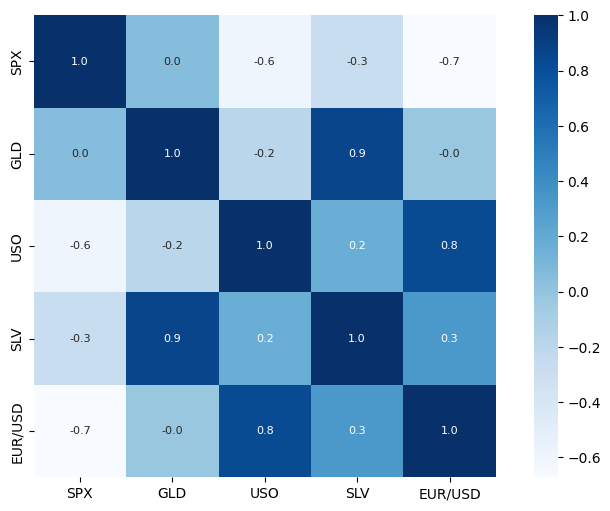

In [81]:
# correlation between variables

correlation=gld_data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")

In [82]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Sneh Patel\AppData\Local\Temp\ipykernel_10812\1397460487.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gld_data["GLD"],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

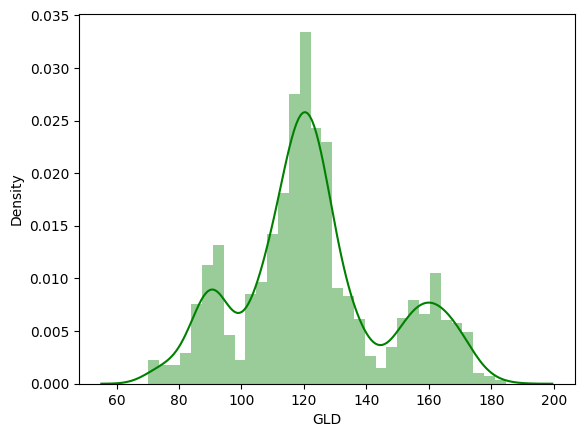

In [83]:
# checking distribution of gold price

sns.distplot(gld_data["GLD"],color="green")

In [84]:
# spliting features and target variables

X=gld_data.drop(["Date","GLD"],axis=1)
print(X.head())
y=gld_data["GLD"]
print(y.head())

           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099
0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64


In [85]:
# spliting training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
# model training

regressor=RandomForestRegressor(n_estimators=100) # n_estimators is number of decision trees which random forest contain
regressor.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [87]:
# model evaluvation

test_data_prediction=regressor.predict(X_test)
print(test_data_prediction)

[122.53939965 130.54850263 127.47099989  96.69089761 118.99170071
 114.30879931 124.80560111 117.70959916 107.98380135  98.19349993
  95.35789944 168.07999834 150.4469011  116.42400063 170.67780125
  85.11579967 123.02049875 109.48489713 113.24370057 131.67630272
 124.2877991  113.63040089 116.16600056 108.63959965 108.5616014
 125.76929915 118.91399965 112.58559942 113.61860132 125.20069892
 146.16140154  89.59290029 167.03079989 113.7649993  108.37640096
 120.24620135 142.00389832 161.12340113 173.97909755 153.14810153
 119.61360155 113.30580092 121.35819952 113.63779935 122.0723382
 107.83320082  88.58709877 114.41389918 129.66370188 117.99030119
 103.96500001 129.77720198 107.06909861 160.7187043  131.60070028
 118.13299995 147.24250099 136.19670243  95.42830139 124.76910171
 115.4730989   86.02590108 104.30539892 113.88660083  84.12009917
 122.27800031 116.66979911 113.54080193 165.35420285  92.26400042
  80.48290058 161.0189005  158.87440103 106.48789978 150.23190096
 109.5849976

In [88]:
error_score=r2_score(y_test,test_data_prediction)
print("r2 score is: ",error_score)

r2 score is:  0.990476129413314


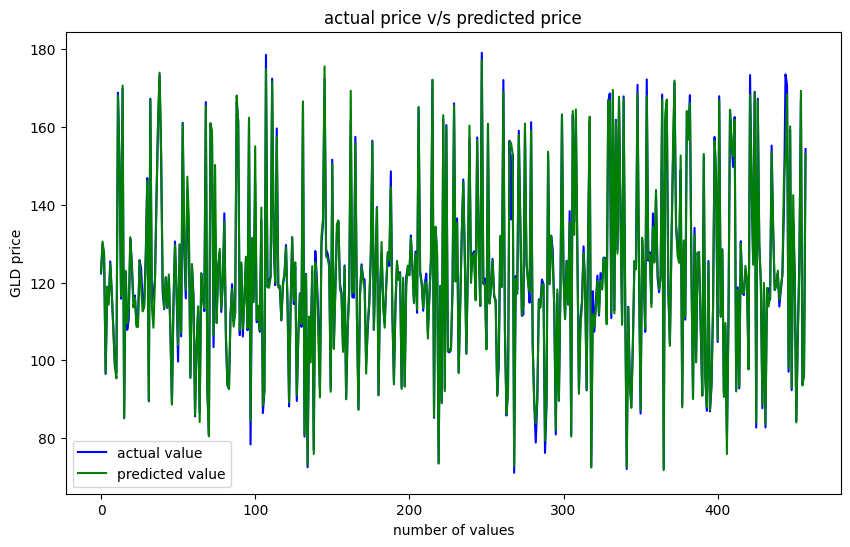

In [91]:
# compare actual values and predicted values

Y_test=list(y_test)
plt.figure(figsize=(10,6))
plt.plot(Y_test,color="blue",label="actual value")
plt.plot(test_data_prediction,color="green",label="predicted value")
plt.title("actual price v/s predicted price")
plt.xlabel("number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()